*Orientações:*

Esse arquivo contem o modelo esperado de respostas para a NAC 3. Podem ser acrescentadas algumas outras informações ou trechos com códigos, entretanto não esqueçam de responder todos os pontos que foram levantados a seguir

*   Fazer o CP6 em grupos do Challenge;
*   Entregar até o dia 21/10/2022 via TEAMS;
*   Utilizar o conjunto de dados CP6.csv para fazer a atividade;
*   Entregar esse arquivo com a sua resolução via TEAMS



**CP6 - Inteligência Artificial e Computacional**

Algoritmos de Regressão

---


Nomes:

[Colocar nome e RM dos integrantes do grupo]

## Exercício CP6

Importar suas bibliotecas aqui:

In [ ]:
# Importando as bibliotecas para os modelos
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

import numpy as np
from collections import Counter

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report, plot_roc_curve

# Modelos de Machine Learning
############################################
# Inserir seus modelos de Machine Learning
############################################

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from google_drive_downloader import GoogleDriveDownloader as gdd


# Plot dos gráficos
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns

1. Carregar os dataset do exercício:

In [ ]:
dados = pd.read_csv("CP6.csv")

Os atributos desse conjunto de dados são:

*    model: modelo do veículo;
*    engine_power: potência do motor;
*    transmission: tipo da transmissão do carro;
*    age_in_days: quantidade de dias desde a fabricação do carro;
*    km: quantidade de quilometros que o veículo já percorreu;
*    previous_owners: Quantidade de donos anteriores do veículo;
*    lat: latitude do vendedor (os carros podem variar seu preço de acordo com sua localização)
*    lon: longitude do vendedor (os carros podem variar seu preço de acordo com sua localização)
*    price: preço de venda do veículo (target da nossa CP6)

2. Fazer a análise exploratória dos dados 

Responda aos seguintes itens:

a) Verificação os tipos de dados envolvidos;

b) Verificar as médias, desvios padrões e distribuição dos dados

c) Checar por valores nulos no conjunto de dados (e se existir, tratá-los)

d) Verificar se existem atributos categóricos para serem tratados. (e se existir, tratá-los)

e) Verificar via heatmap com a correlação de Pearson a relação entre os atributos

In [ ]:
dados.head() 

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
0,pop,69,manual,4474,56779,2,45.071079,7.46403,4490
1,lounge,69,manual,2708,160000,1,45.069679,7.70492,4500
2,lounge,69,automatic,3470,170000,2,45.514599,9.28434,4500
3,sport,69,manual,3288,132000,2,41.903221,12.49565,4700
4,sport,69,manual,3712,124490,2,45.532661,9.03892,4790


In [ ]:
dados.shape

(380, 9)

In [ ]:
# a) Verificando os tipos de dados

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            380 non-null    object 
 1   engine_power     380 non-null    int64  
 2   transmission     380 non-null    object 
 3   age_in_days      380 non-null    int64  
 4   km               380 non-null    int64  
 5   previous_owners  380 non-null    int64  
 6   lat              380 non-null    float64
 7   lon              380 non-null    float64
 8   price            380 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 26.8+ KB


In [ ]:
# b) Verificar as médias, desvios padrões e distribuição dos dados

dados.describe()

,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,73.015789,3310.265789,102196.250000,1.510526,44.257712,10.742644,5881.655263
std,9.984672,1437.555063,47115.355234,0.560244,1.767518,2.167753,2170.617946
min,69.000000,91.000000,4981.000000,1.000000,37.510872,7.320720,2890.000000
25%,69.000000,3097.250000,76611.750000,1.000000,43.514196,9.159140,4600.000000
50%,69.000000,3927.000000,112000.000000,1.000000,45.069679,10.301505,5000.000000
75%,69.000000,4322.000000,135000.000000,2.000000,45.556942,12.346788,5500.000000
max,101.000000,4719.000000,259000.000000,4.000000,46.781651,18.168011,15900.000000


In [ ]:
# c) Checar por valores nulos no conjunto de dados (e se existir, tratá-los)
dados.isnull().sum()

model              0
engine_power       0
transmission       0
age_in_days        0
km                 0
previous_owners    0
lat                0
lon                0
price              0
dtype: int64

como não exitem dados nulos, não é necessário tratá-los


In [ ]:
# d) Verificar se existem atributos categóricos para serem tratados. (e se existir, tratá-los)

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            380 non-null    object 
 1   engine_power     380 non-null    int64  
 2   transmission     380 non-null    object 
 3   age_in_days      380 non-null    int64  
 4   km               380 non-null    int64  
 5   previous_owners  380 non-null    int64  
 6   lat              380 non-null    float64
 7   lon              380 non-null    float64
 8   price            380 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 26.8+ KB


In [ ]:
dados_backup = dados

####Como visto acima, existem duas colunas categórias: "model" e "transmission". Trataremos a coluna "model" com o one hot enconding e o label enconding na "transmission".

In [ ]:
# aplicando o label enconding
dados["transmission"] = dados["transmission"].replace({
    "manual" : 0,
    "automatic": 1 
}) 

In [ ]:
# aplicando o one hot enconding

data = pd.get_dummies(dados["model"], prefix = "model")
data.head()

,model_lounge,model_pop,model_sport,model_star
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0


In [ ]:
dados = pd.concat([dados, data], axis = 1)
dados.head()

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price,model_lounge,model_pop,model_sport,model_star
0,pop,69,0,4474,56779,2,45.071079,7.46403,4490,0,1,0,0
1,lounge,69,0,2708,160000,1,45.069679,7.70492,4500,1,0,0,0
2,lounge,69,1,3470,170000,2,45.514599,9.28434,4500,1,0,0,0
3,sport,69,0,3288,132000,2,41.903221,12.49565,4700,0,0,1,0
4,sport,69,0,3712,124490,2,45.532661,9.03892,4790,0,0,1,0


In [ ]:
dados = dados.drop(columns="model")

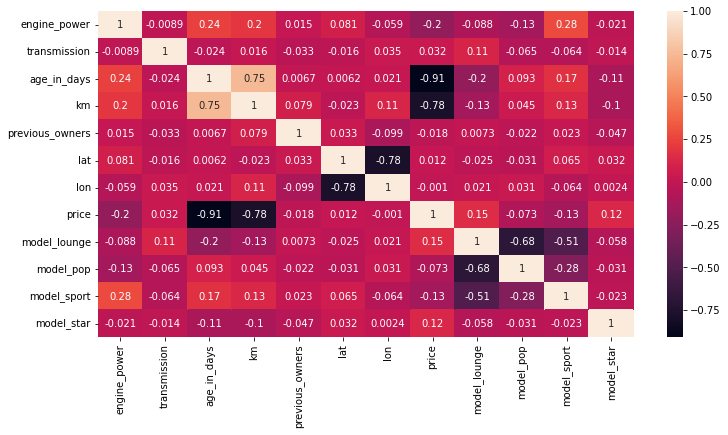

In [ ]:
# e) Verificar via heatmap com a correlação de Pearson a relação entre os atributosm

plt.figure(figsize=(12,6))
sns.heatmap(dados.corr(), annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4bd88aacd0>,
      dtype=object)

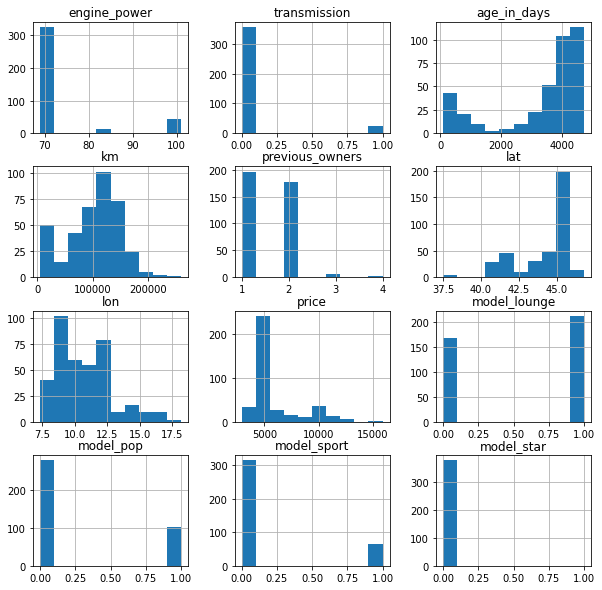

In [ ]:
# verificando a distribuição dos dados

dados.hist(figsize=(10,10))

3. Dividir os dados em conjunto de treinamento e teste e treinar dois modelos distintos de regressão.

## Regrecao Linear

In [ ]:
# Dividinco o conjunto de treinamento

X = dados.drop(columns=['price']).values
y = dados.price.values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42
                                                    )

In [ ]:
# treinando o modelo 
model = LinearRegression().fit(X_train, y_train)

In [ ]:
# Predicao do modelo
y_pred = model.predict(X_test)
y_pred

array([ 4294.75731002,  5368.03003778,  4690.80471507,  9481.81642348,
        9566.74246625,  4512.54236639, 10224.90502694,  4928.34998238,
        4864.87697988,  5146.41965786,  4175.84530319,  5001.5959207 ,
        4706.50583266,  5020.62121103,  4851.69489483,  5641.00125905,
        5302.16903736, 10001.87291315,  4377.56896206, 10779.26813814,
        7099.19888022,  4993.3709912 ,  5535.83150237,  4922.29686425,
        9485.6398083 ,  4956.18746853,  8794.25863224, 10163.78831459,
        4598.9048522 ,  9530.40465737,  4385.44266586,  4380.68008853,
        9413.23863047,  4873.1368327 ,  5192.61434637,  4657.12186927,
        4583.52884408,  4676.66003294,  4429.97443433,  4157.7935964 ,
        4874.15195226,  5293.02796006,  8733.91010438,  8245.3805392 ,
        3969.27518307,  7012.78300763,  4995.92120495,  8988.95075743,
        9787.74105942,  4260.99088036, 10444.14962714,  5558.76751483,
        5792.34418971,  3626.54499242,  4711.63037606,  5409.73916261,
      

### Metrica de Desempenho

In [ ]:
r2_score(y_test, y_pred)

0.8523302843371784

In [ ]:
mean_squared_error(y_test, y_pred)

701346.7418616182

In [ ]:
mean_absolute_error(y_test, y_pred)

573.7858268761833

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
y_pred_RFR = forest_reg.predict(X_test)

###Metrica de desempenho

In [ ]:
r2_score(y_test, y_pred_RFR)

0.8733175432053654

In [ ]:
mean_squared_error(y_test, y_pred_RFR)

601669.2584877192

In [ ]:
mean_absolute_error(y_test, y_pred_RFR)

490.57298245614044

## Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(min_samples_leaf=5, n_estimators=50)
gbrt.fit(X_train, y_train)
y_pred_gbrt = gbrt.predict(X_test)

###Metrica de desempenho

In [ ]:
r2_score(y_test, y_pred_gbrt)

0.8646419340063947

In [ ]:
mean_absolute_error(y_test, y_pred_gbrt)

528.992000164708

In [ ]:
mean_squared_error(y_test, y_pred_gbrt)

642873.4432323824